## 作業一  練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'國家': ['美國','德國','日本','英國','中國','台灣'],       
        '人口':[ ]}

In [3]:
for i in data['國家']:
     data['人口'].append(np.random.randint(10000,100000000))

In [4]:
country = pd.DataFrame(data)
country

,國家,人口
0,美國,75308730
1,德國,29910356
2,日本,67433282
3,英國,88977694
4,中國,67516976
5,台灣,1963543


In [5]:
max_people=country['人口'].max()
country[country['人口']==max_people]

,國家,人口
3,英國,88977694


## 作業二  讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [6]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

## 將 txt 轉成 pandas dataframe

In [7]:
data=pd.read_table(target_url,header =None)
data.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [8]:
data.columns=['name','url']
data.head()

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [9]:
# 得到第一筆資料的連結
first_link = data['url'][0]
first_link 

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

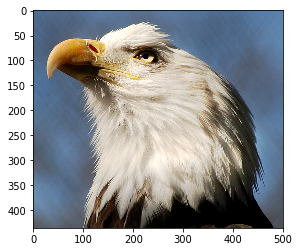

In [12]:
#用 PIL套件讀取圖片
import matplotlib.pyplot as plt
import requests as req
from PIL import Image
from io import BytesIO
response = req.get(first_link)
image = Image.open(BytesIO(response.content))
imgarry=np.array(image)
plt.imshow(imgarry)
plt.show()

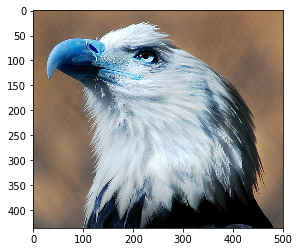

In [13]:
#用 openCV 讀取圖片
import cv2
import numpy as np

import urllib

resp = urllib.request.urlopen(first_link)
image = np.asarray(bytearray(resp.read()))
image = cv2.imdecode(image,cv2.IMREAD_COLOR)
plt.imshow(image)
plt.show()


用openCV 讀到的圖片色彩變的怪怪的 !  

In [14]:
#用 openCV套件　讀圖片檔
def img2arr_fromURLs_cv(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    potocount=1
    for iurl in url_list:
        try:
            resp = urllib.request.urlopen(iurl)
            image = np.asarray(bytearray(resp.read()))
            image = cv2.imdecode(image,cv2.IMREAD_COLOR)
            img_list.append(image)
            potocount+=1
        except:
            print(f'{potocount} of Photo url is fail! ')
            potocount+=1
            pass
            
    return img_list
   

In [15]:
#用 PIL套件　讀圖片檔
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    photocount=1
  
    for iurl in url_list:
        try:
            response = req.get(iurl)
            img = Image.open(BytesIO(response.content))
            imgarry=np.array(img)
            img_list.append(imgarry)
            photocount+=1
        except:
            print(f'{photocount} of Photo url is fail!')
            photocount+=1
            continue
            
    return img_list
   

5 of Photo url is fail!
Total images that we got: 4 


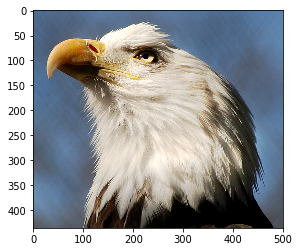

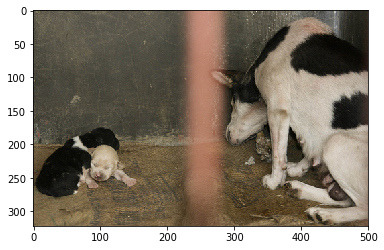

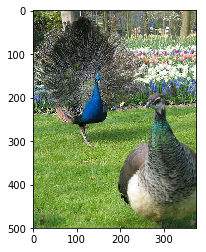

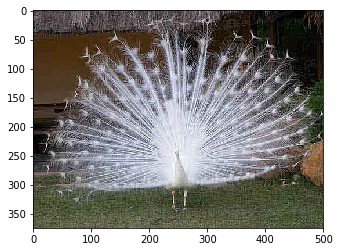

In [16]:
result = img2arr_fromURLs(data['url'][0:5])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

5 of Photo url is fail! 
6 of Photo url is fail! 
Total images that we got: 4 


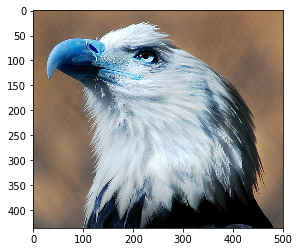

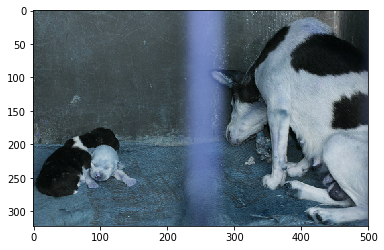

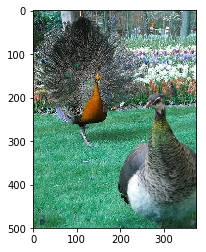

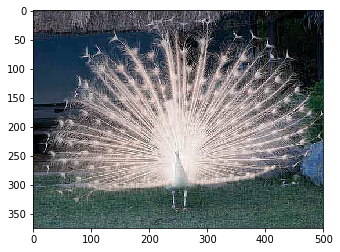

In [17]:
result = img2arr_fromURLs_cv(data['url'][0:6])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

用 PIL 套件的速度比較快且顏色不會有異常